In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

# Question 1. Import and understand the data. [5 Marks]
#    A. Import ‘signal-data.csv’ as DataFrame. [2 Marks]
#    B. Print 5 point summary and share at least 2 observations. [3 Marks]

In [2]:
data = pd.read_csv("signal-data.csv")

In [3]:
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [4]:
data.shape

(1567, 592)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [6]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.4900,3056.6500,3356.3500
1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.4050,2538.8225,2846.4400
2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.0667,2218.0555,2315.2667
3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.2144,1591.2235,3715.0417
4,1553.0,4.197013,56.355540,0.6815,1.017700,1.3168,1.5257,1114.5366
...,...,...,...,...,...,...,...,...
586,1566.0,0.021458,0.012358,-0.0169,0.013425,0.0205,0.0276,0.1028
587,1566.0,0.016475,0.008808,0.0032,0.010600,0.0148,0.0203,0.0799
588,1566.0,0.005283,0.002867,0.0010,0.003300,0.0046,0.0064,0.0286
589,1566.0,99.670066,93.891919,0.0000,44.368600,71.9005,114.7497,737.3048


# Question 2. Data cleansing: [15 Marks]
#    A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature. [5 Marks]
#    B. Identify and drop the features which are having same value for all the rows. [3 Marks]
#    C. Drop other features if required using relevant functional knowledge. Clearly justify the same. [2 Marks]
#    D. Check for multi-collinearity in the data and take necessary action. [3 Marks]
#    E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions. [2 Marks]

In [8]:
#    A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature. [5 Marks]

data.isnull().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [9]:
data.isnull().mean()

Time         0.000000
0            0.003829
1            0.004467
2            0.008934
3            0.008934
               ...   
586          0.000638
587          0.000638
588          0.000638
589          0.000638
Pass/Fail    0.000000
Length: 592, dtype: float64

In [10]:
percent_missing = data.isnull().sum() * 100 / len(data)

percent_missing

Time         0.000000
0            0.382897
1            0.446713
2            0.893427
3            0.893427
               ...   
586          0.063816
587          0.063816
588          0.063816
589          0.063816
Pass/Fail    0.000000
Length: 592, dtype: float64

In [11]:
# Storing the data which has missing values greater than or equal to 80% into the new data frame then imputing them with mean 
data1=data[data.columns[data.isnull().mean() <= 0.80]]
data1.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [12]:
data3 = data1.fillna(data1.mean())

In [13]:
# Storing the missing values which are greater than or equal to 20% to new dataframe and storing it to new data2 and just ignoring that dataframe 
data2=data[data.columns[data.isnull().mean() >= 0.20]]
data2.head()

,72,73,85,109,110,111,112,157,158,220,...,385,492,516,517,518,519,578,579,580,581
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0096,0.0201,0.0060,208.2045
2,140.6972,485.2665,NaN,NaN,NaN,NaN,0.4684,NaN,NaN,NaN,...,0.0221,NaN,NaN,NaN,NaN,36.9067,0.0584,0.0484,0.0148,82.8602
3,160.3210,464.9735,NaN,NaN,NaN,NaN,0.4647,NaN,NaN,NaN,...,0.0038,NaN,NaN,NaN,NaN,4.1200,0.0202,0.0149,0.0044,73.8432
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:

data2.dropna(axis='columns',inplace=True)

In [15]:
# All columns are removed
data2

""
0
1
2
3
4
...
1562
1563
1564
1565


In [16]:
data3.isnull().any().any()
data3.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,97.934373,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.204500,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.860200,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.843200,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,97.934373,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1


In [17]:
# Dropping time column as we are only considering numerical columns 

data3.drop('Time',axis=1,inplace=True)

In [18]:
data3.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1567.0,3014.452896,73.480613,2743.2400,2966.66500,3011.8400,3056.5400,3356.3500
1,1567.0,2495.850231,80.227793,2158.7500,2452.88500,2498.9100,2538.7450,2846.4400
2,1567.0,2200.547318,29.380932,2060.6600,2181.09995,2200.9556,2218.0555,2315.2667
3,1567.0,1396.376627,439.712852,0.0000,1083.88580,1287.3538,1590.1699,3715.0417
4,1567.0,4.197013,56.103066,0.6815,1.01770,1.3171,1.5296,1114.5366
...,...,...,...,...,...,...,...,...
586,1567.0,0.021458,0.012354,-0.0169,0.01345,0.0205,0.0276,0.1028
587,1567.0,0.016475,0.008805,0.0032,0.01060,0.0148,0.0203,0.0799
588,1567.0,0.005283,0.002866,0.0010,0.00330,0.0046,0.0064,0.0286
589,1567.0,99.670066,93.861936,0.0000,44.36860,72.0230,114.7497,737.3048


In [19]:
# checking attribute type( except the target all the variables are float)
data3.dtypes

0            float64
1            float64
2            float64
3            float64
4            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 583, dtype: object

# B. Identify and drop the features which are having same value for all the rows. [3 Marks]

In [20]:
#dropping the columns the have constant signal
cols = data3.select_dtypes([np.number]).columns
std = data3[cols].std()
cols_to_drop = std[std==0].index
data3.drop(cols_to_drop, axis=1,inplace=True)
data3.head()

,0,1,2,3,4,6,7,8,9,10,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,97.934373,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,208.204500,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,82.860200,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,73.843200,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,97.934373,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1


# C. Drop other features if required using relevant functional knowledge. Clearly justify the same. [2 Marks]

# i)  Removing highly correlated columns of data frame 

In [21]:
# Create correlation matrix
corr_matrix = data3.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
data3.drop(to_drop, axis=1, inplace=True)

From above code I have dropped the columns which are highly correlated.

In [22]:
data3.shape

(1567, 282)

# ii) Feature reduction with using techniques like PCA

In [23]:


from sklearn.decomposition import PCA

data = data3
# define transform
pca = PCA()
# prepare transform on dataset
pca.fit(data)
# apply transform to dataset
transformed = pca.transform(data)

In [24]:
transformed.shape

(1567, 282)

In [65]:
# D. Check for multi-collinearity in the data and take necessary action. [3 Marks]

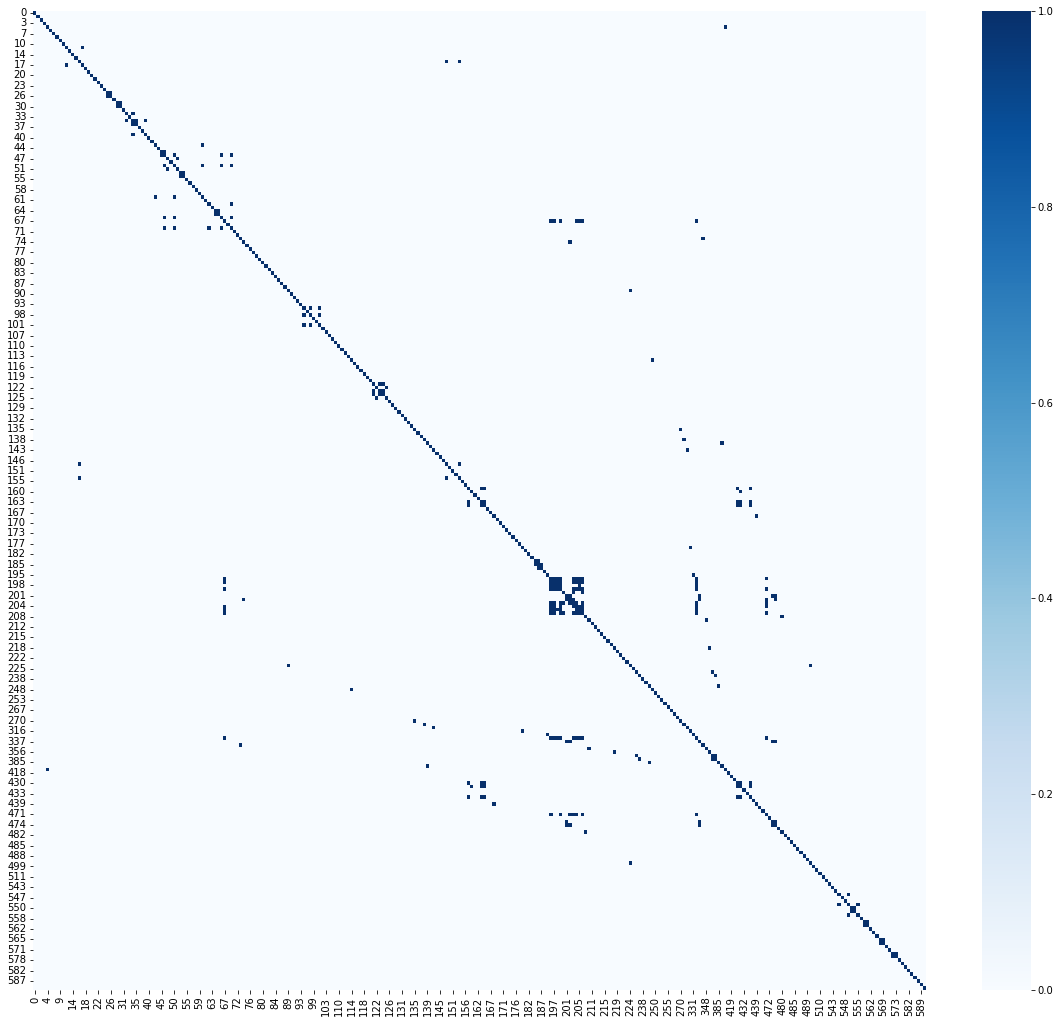

In [53]:
#checking for correlation 
plt.figure(figsize=(20,18))
corr=data3.corr()
sns.heatmap(abs(corr>0.7),cmap="Blues");

In [108]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df1 = data3.copy()
X = df1[list(df1.columns[:10])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
2,2836.984888,2
0,1380.749796,0
1,860.648891,1
5,511.769987,6
7,399.952661,8
6,208.549406,7
3,24.201838,3
4,1.175123,4
8,1.043935,9
9,1.010488,10


almost all variables have a VIF value above 5. And even the 26 variables have a VIF value above 1 thousand. That’s a huge factor! Because of that, we need to clean those multicollinearities from the data.

Removing multicollinearities

Removing features is not recommended. The reason is that there’s a possibility of information loss because we remove that feature. Therefore, we will generate new features first.

In [109]:
df1['ColDiff26_25'] = df1['26'] - df1['25']
df1['ColAdd09_10'] = df1['9'] + df1['10']
df1['ColDiff24_23'] = df1['24'] - df1['23']
df1['ColAdd07_03'] = df1['7'] + df1['3']


X = df1.drop(['26', '25', '9', '10', '24', '23', '7', '3'], axis=1)

X.head()

,0,1,2,4,6,8,11,12,14,15,...,582,583,586,587,589,Pass/Fail,ColDiff26_25,ColAdd09_10,ColDiff24_23,ColAdd07_03
0,3030.93,2564.00,2187.7333,1.3602,97.6133,1.5005,0.9455,202.4396,7.9558,414.8710,...,0.5005,0.0118,0.021458,0.016475,99.670066,0,0.8775,0.0128,4794.75,1411.2507
1,3095.78,2465.14,2230.4222,0.8294,102.3433,1.4966,0.9627,200.5470,10.1548,414.7347,...,0.5019,0.0223,0.009600,0.020100,208.204500,0,0.7170,-0.0153,1858.50,1463.7853
2,2932.61,2559.94,2186.4111,1.5102,95.4878,1.4436,0.9615,202.0179,9.5157,416.7075,...,0.4958,0.0157,0.058400,0.048400,82.860200,1,0.7173,0.0054,2130.50,1698.1413
3,2988.72,2479.90,2199.0333,1.3204,104.2367,1.4882,0.9629,201.8482,9.6052,422.2894,...,0.4990,0.0103,0.020200,0.014900,73.843200,0,0.6901,-0.0157,2857.75,909.9143
4,3032.24,2502.87,2233.3667,1.5334,100.3967,1.5031,0.9569,201.9424,10.5661,420.5925,...,0.4800,0.4766,0.020200,0.014900,73.843200,0,0.7025,-0.0103,4104.50,1326.6435


In [110]:
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
54,1.501200e+14,70
36,1.452774e+14,50
45,4.921967e+13,60
30,4.572182e+13,43
53,8.465413e+12,68
...,...,...
273,1.512006e+00,Pass/Fail
76,1.459634e+00,93
75,1.409537e+00,92
275,1.400679e+00,ColAdd09_10


Now all VIF values are less than 5.

# E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions. [2 Marks]

In [111]:
#checking for distribution of the target class shows that the data set is highly imbalanced
data3['Pass/Fail'].value_counts(normalize=True)

0    0.933631
1    0.066369
Name: Pass/Fail, dtype: float64

In [112]:
#label encoding the target class
data3['Pass/Fail']=data3['Pass/Fail'].replace([-1,1],[0,1])

In [113]:
data3.head()

,0,1,2,3,4,6,7,8,9,10,...,573,578,579,581,582,583,586,587,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,0.3157,0.021615,0.016829,97.934373,0.5005,0.0118,0.021458,0.016475,99.670066,0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,0.2653,0.009600,0.020100,208.204500,0.5019,0.0223,0.009600,0.020100,208.204500,0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,0.1882,0.058400,0.048400,82.860200,0.4958,0.0157,0.058400,0.048400,82.860200,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,0.1738,0.020200,0.014900,73.843200,0.4990,0.0103,0.020200,0.014900,73.843200,0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,0.2224,0.021615,0.016829,97.934373,0.4800,0.4766,0.020200,0.014900,73.843200,0


In [114]:
data3.isnull().any(axis = 1).sum()

0

# 3. Data analysis & visualisation: [5 Marks]
#    A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis. [2 Marks]
#    B. Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis. [3 Marks]

In [125]:
#making a copy of the dataset df has  target class

data4=data3.copy()
data4.drop(['Pass/Fail'],axis=1,inplace=True)
data4.head()

,0,1,2,3,4,6,7,8,9,10,...,572,573,578,579,581,582,583,586,587,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,8.95,0.3157,0.021615,0.016829,97.934373,0.5005,0.0118,0.021458,0.016475,99.670066
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,5.92,0.2653,0.009600,0.020100,208.204500,0.5019,0.0223,0.009600,0.020100,208.204500
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,11.21,0.1882,0.058400,0.048400,82.860200,0.4958,0.0157,0.058400,0.048400,82.860200
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,9.33,0.1738,0.020200,0.014900,73.843200,0.4990,0.0103,0.020200,0.014900,73.843200
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,8.83,0.2224,0.021615,0.016829,97.934373,0.4800,0.4766,0.020200,0.014900,73.843200


In [126]:
data4.shape

(1567, 281)

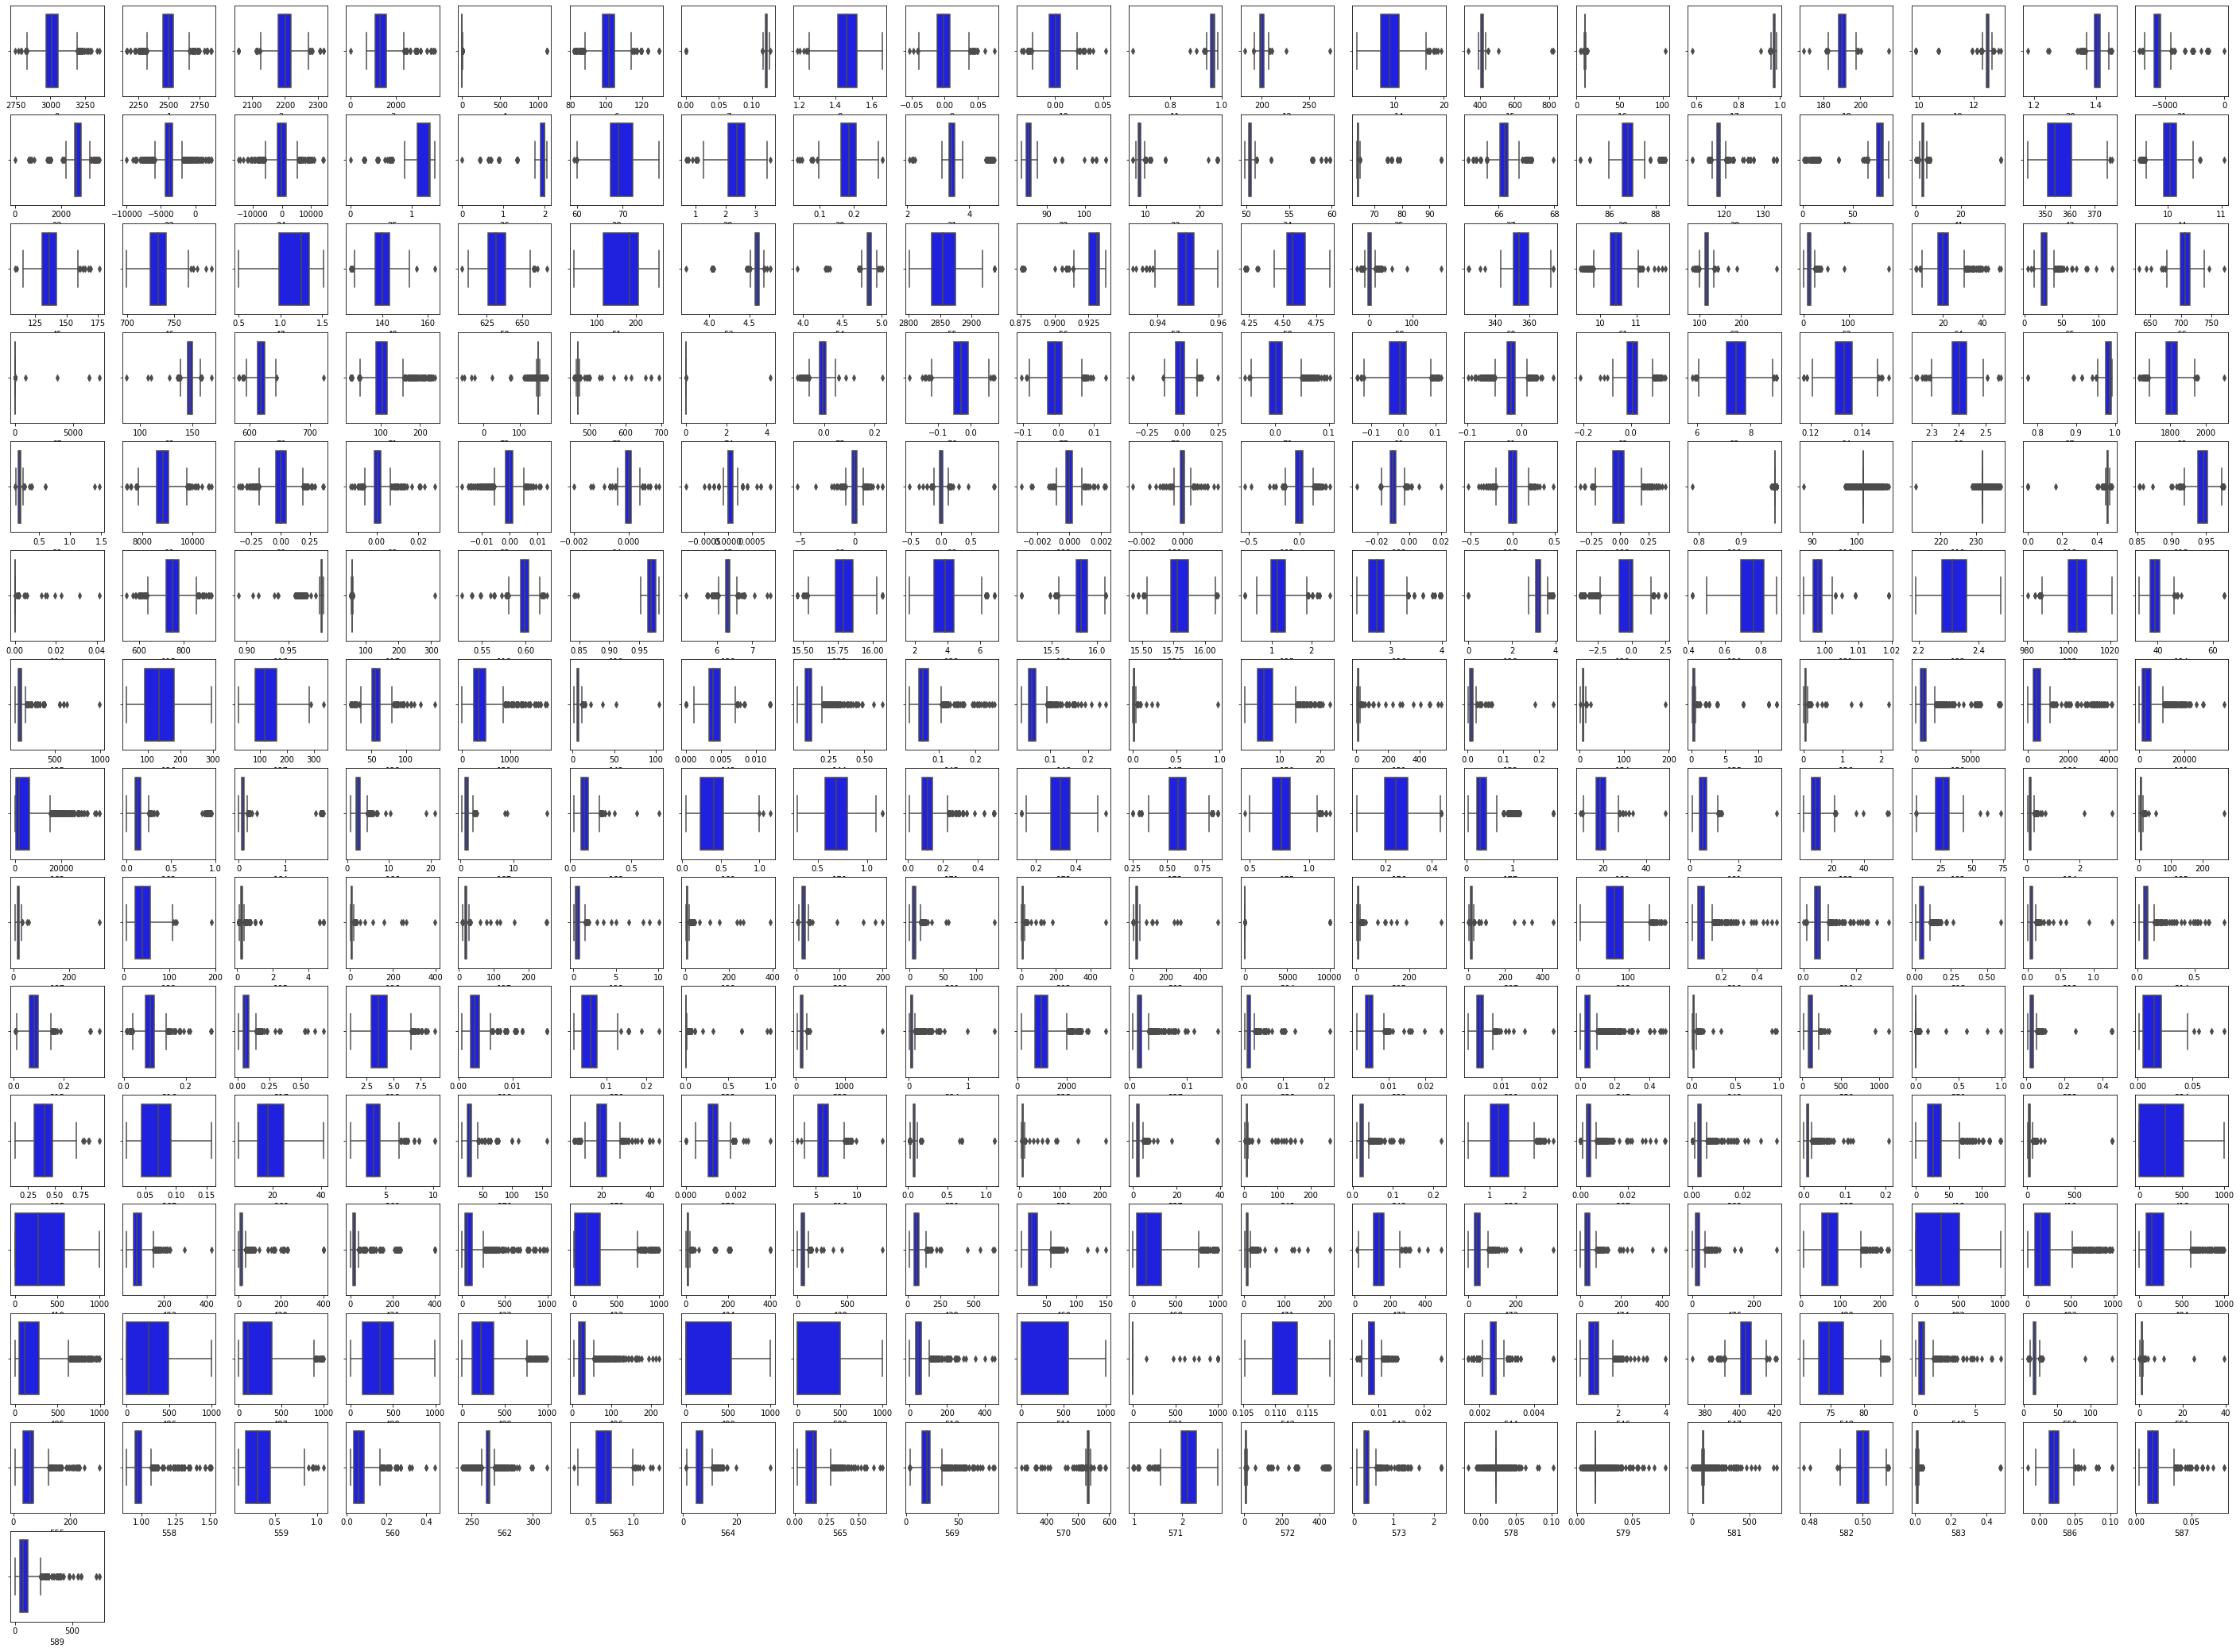

In [127]:
#Boxplot to check for outliers
plt.figure(figsize=(50, 50))
col = 1
for i in data4.columns:
    plt.subplot(20,20, col)
    sns.boxplot(data4[i],color='blue')
    col += 1

In [128]:
#Majority of the attributes have outliers, will be replacing them with the median
#find the outliers and replace them by median
for i in data4.columns:
    q1 = data4[i].quantile(0.25)
    q3 = data4[i].quantile(0.75)
    iqr = q3 - q1
    
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    
    data4.loc[(data4[i] < low) | (data4[i] > high), i] = data4[i].median()

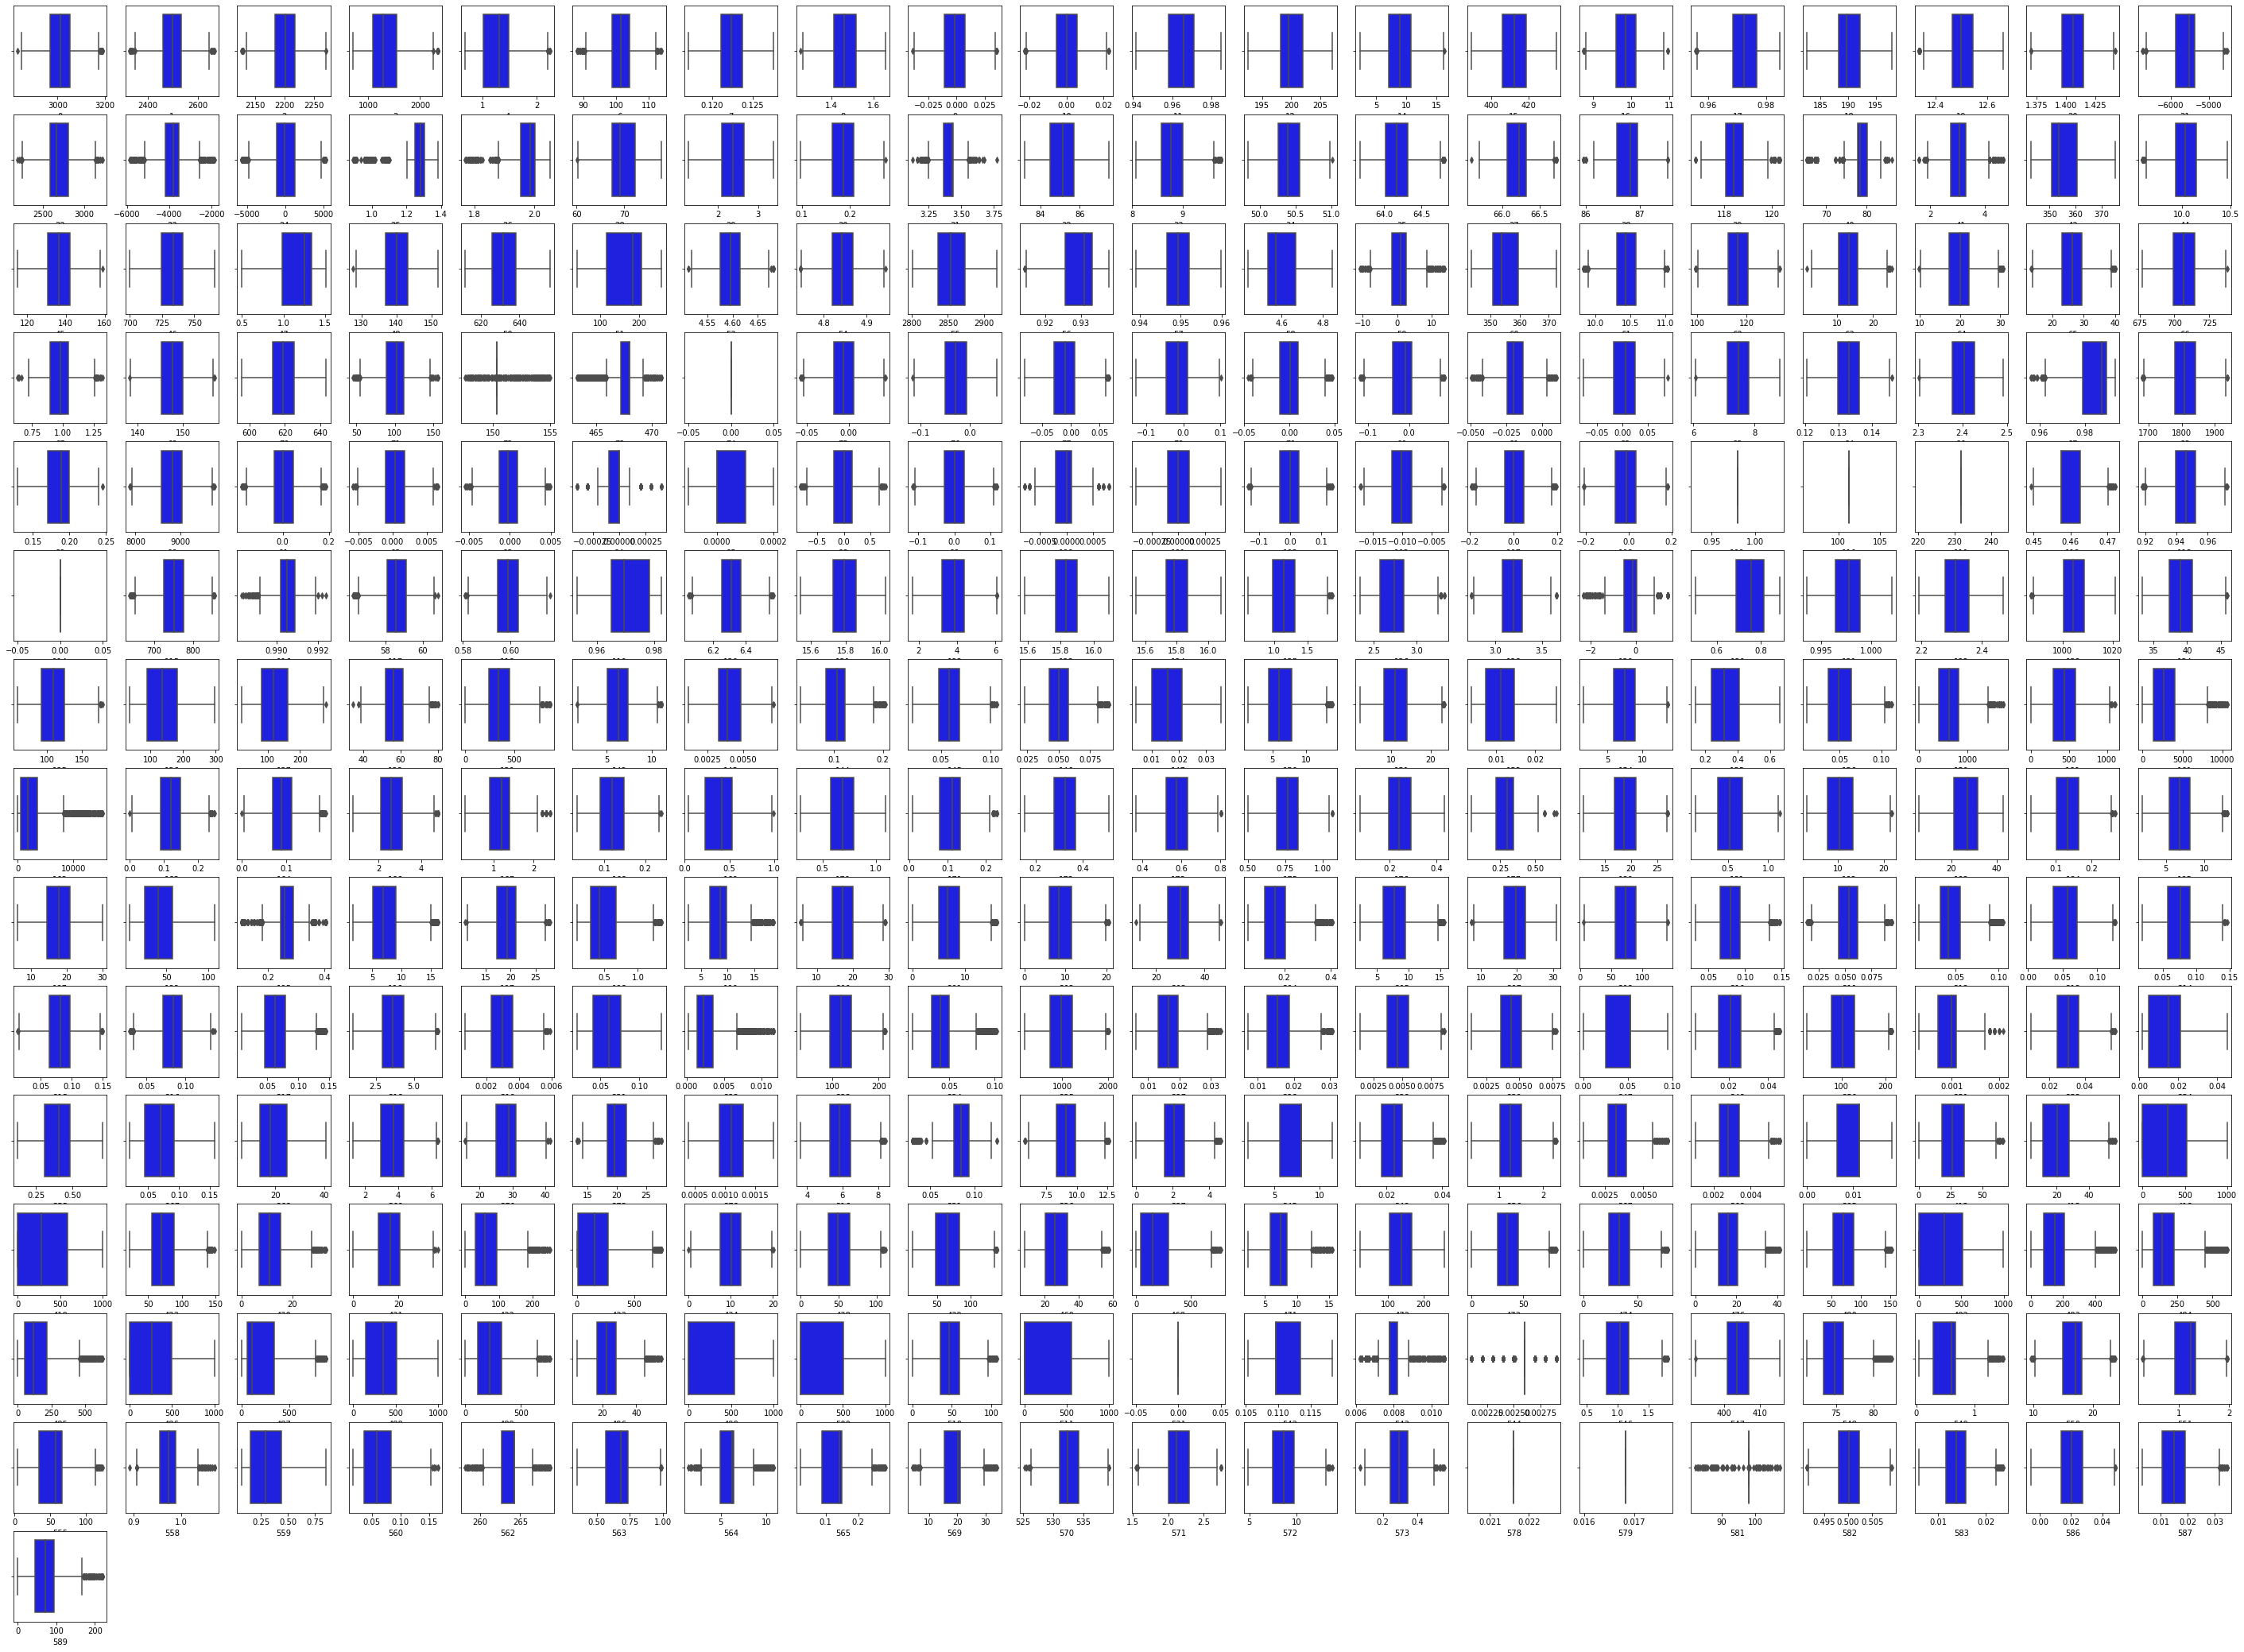

In [129]:
#Boxplot to check for outliers
plt.figure(figsize=(50, 50))
col = 1
for i in data4.columns:
    plt.subplot(20,20, col)
    sns.boxplot(data4[i],color='blue')
    col += 1

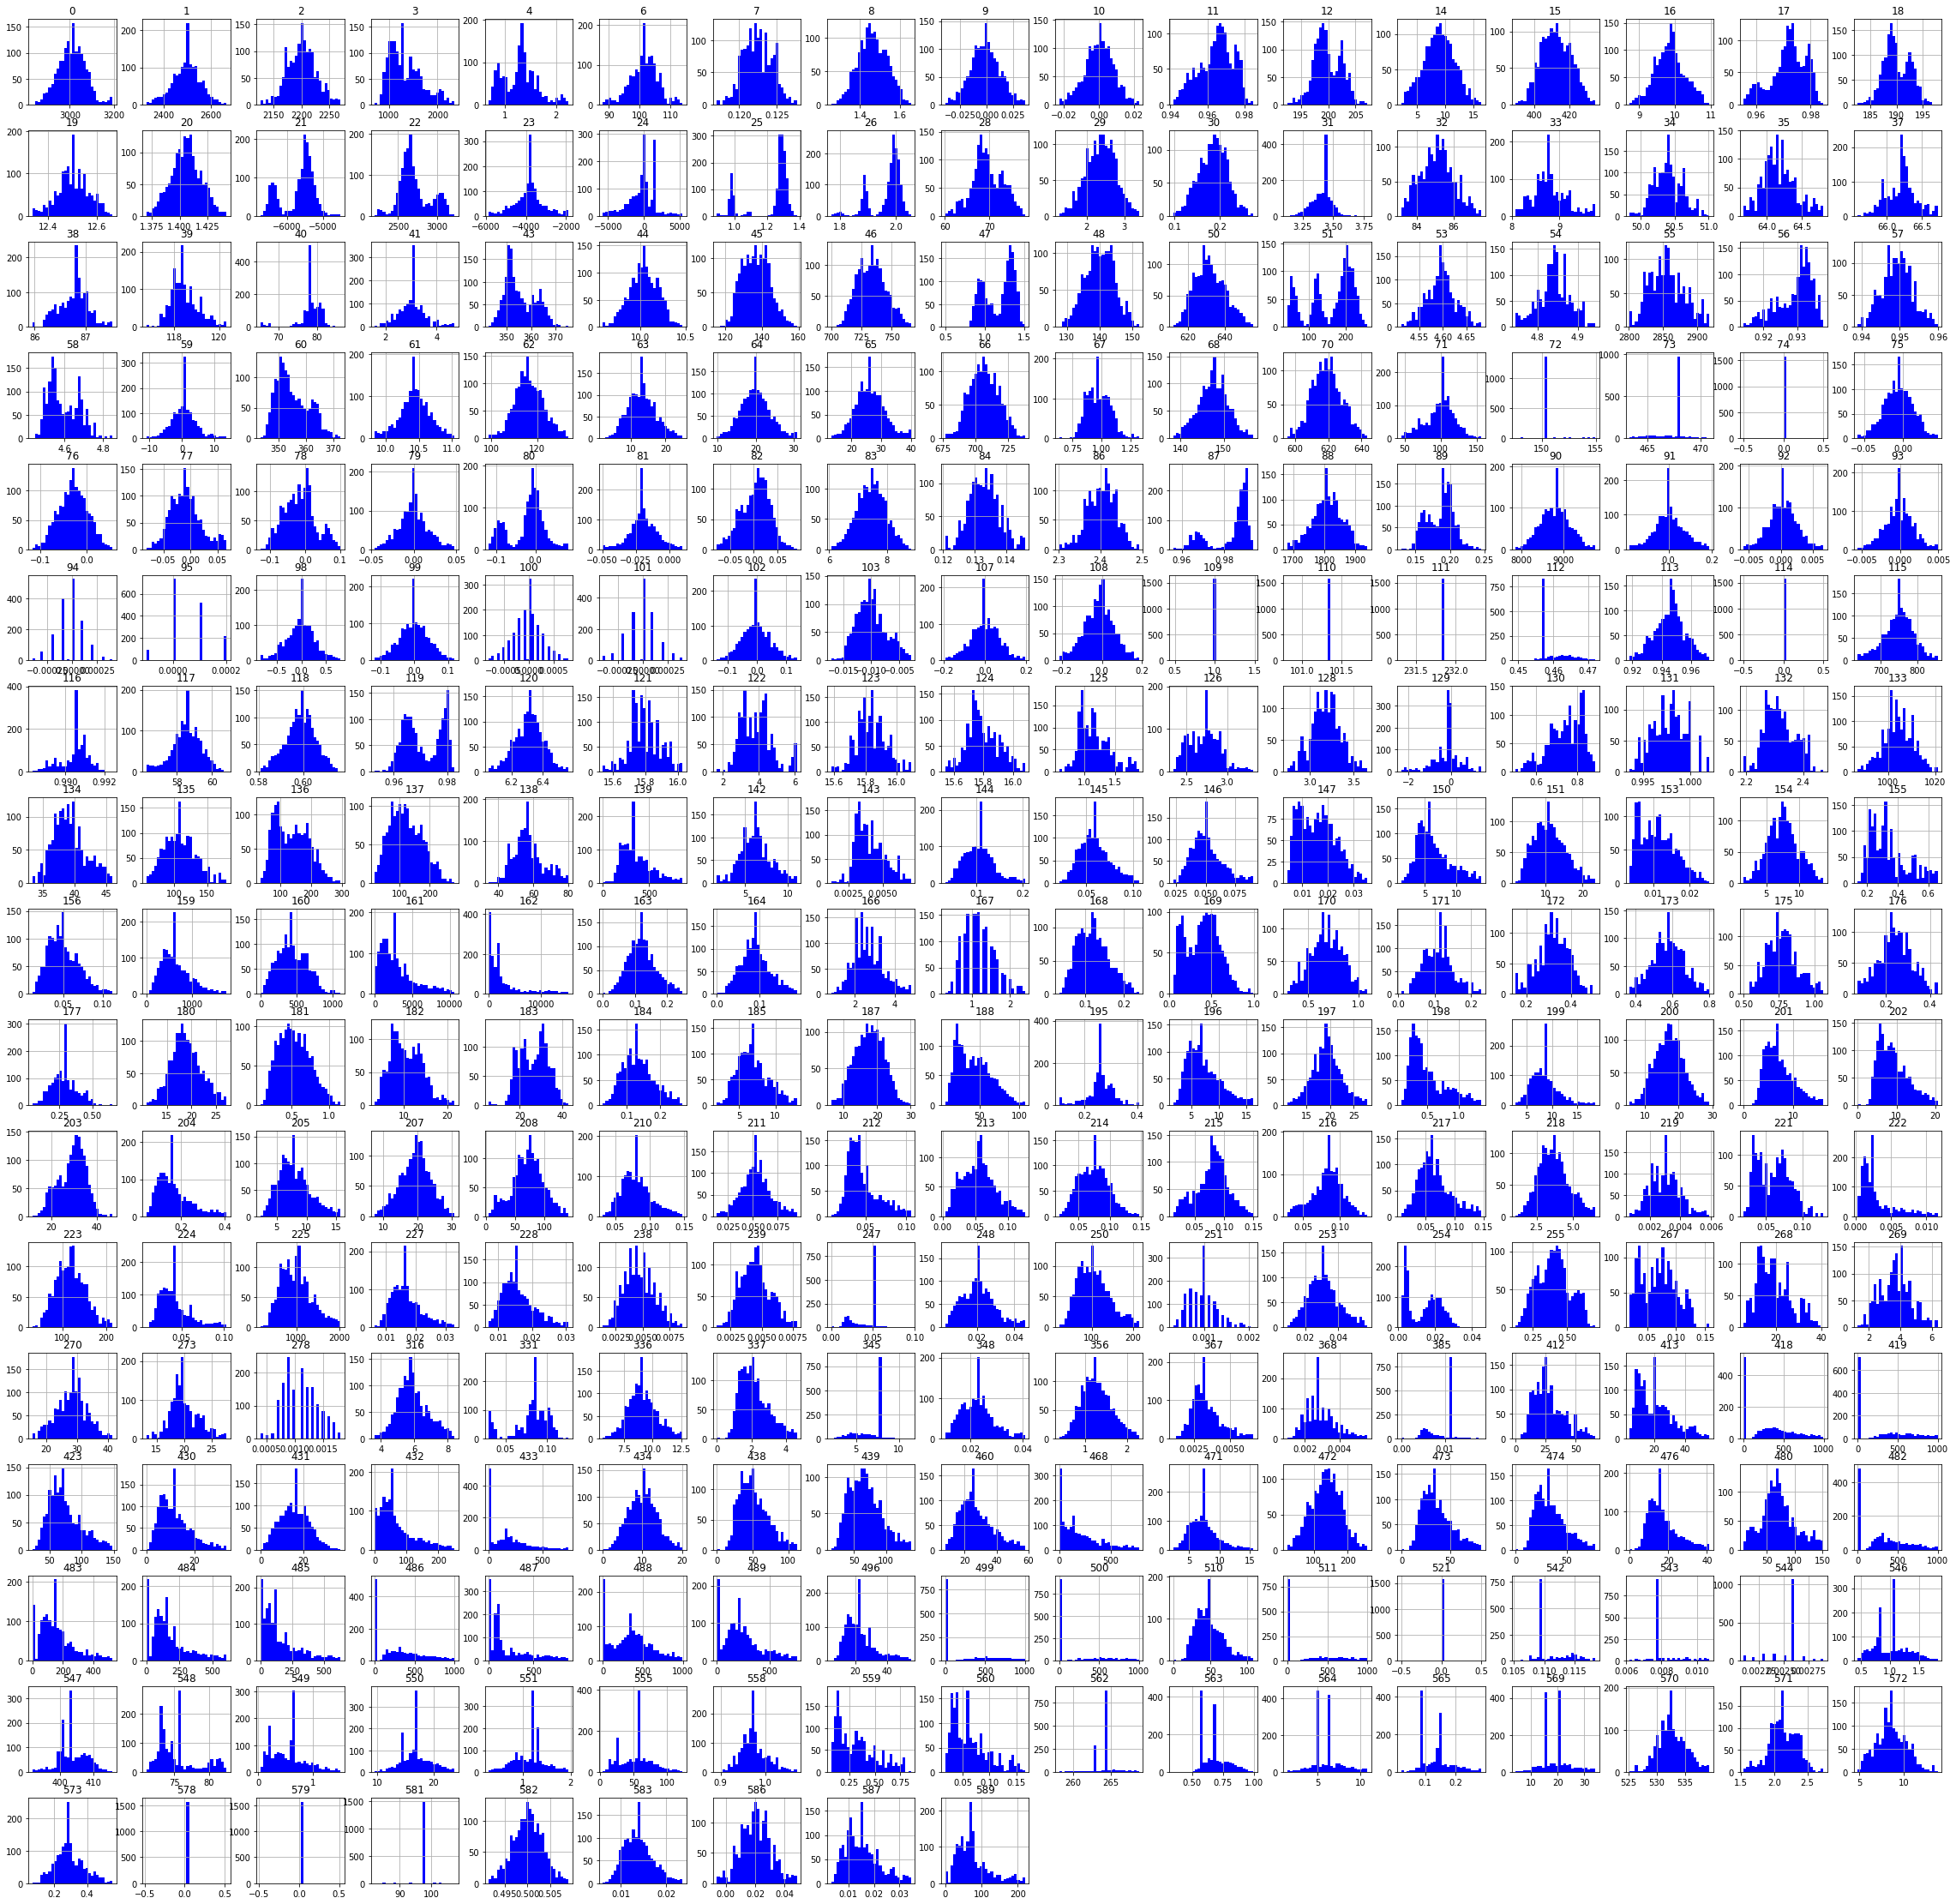

In [130]:
#plotting histogram to check for the frequency of values within a variable
data4.hist(bins = 30, figsize = (40, 40), color = 'blue')
plt.show()

Some variables have still have 0 as a constant signal, will be drooping them after scaling with z-score

LinAlgError: singular matrix

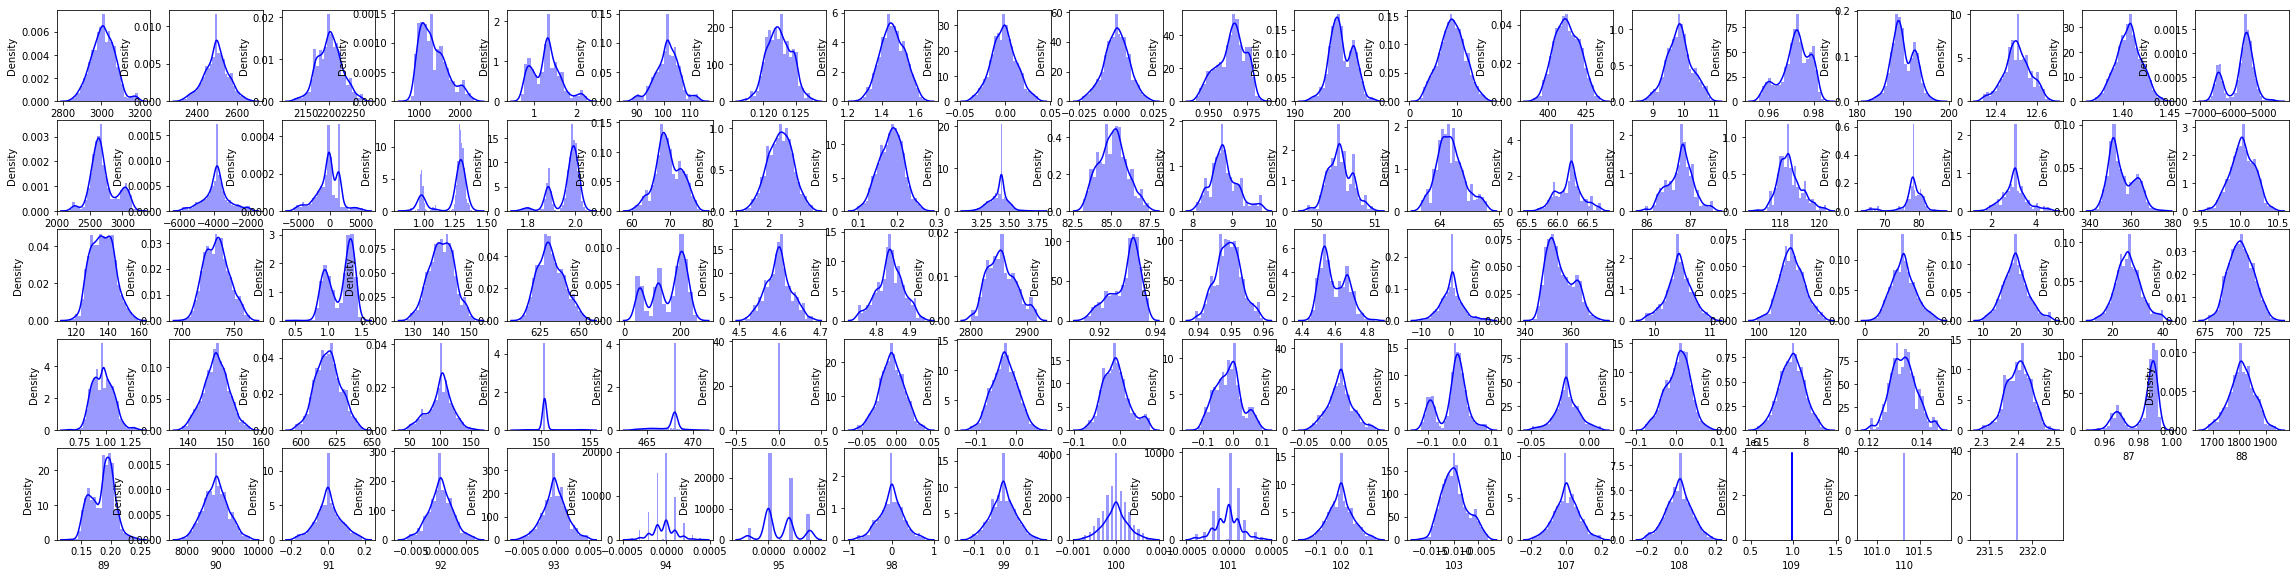

In [136]:
#density plot to check for the distribution of the variables
plt.figure(figsize=(40, 40))
col = 1
for i in data4.columns:
    plt.subplot(20, 20, col)
    sns.distplot(data4[i],kde=True, color = 'b')
    col += 1 

Majority of the signal variable seems to have a normal distribution. While some are right skewed. and some are having long tail at right.

In [137]:
#scaling with z-score
from scipy.stats import zscore
dataScaled= data4.apply(zscore)  
dataScaled.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1567.0,3.101539e-15,1.000319,-2.886322,-0.677568,0.029781,0.678056,2.932919
1,1567.0,-1.826235e-15,1.000319,-2.860956,-0.623169,0.032317,0.626939,2.838449
2,1567.0,-3.473361e-15,1.000319,-2.895842,-0.698999,-0.001776,0.645676,2.697531
3,1567.0,9.612959e-16,1.000319,-1.899141,-0.781970,-0.174610,0.616370,2.998861
4,1567.0,4.625103e-16,1.000319,-1.845866,-0.836804,0.061808,0.582247,2.846485
...,...,...,...,...,...,...,...,...
582,1567.0,-6.169071e-15,1.000319,-2.652850,-0.646419,0.032681,0.680913,2.749080
583,1567.0,-8.161946e-17,1.000319,-2.480142,-0.720050,-0.028586,0.600019,3.083005
586,1567.0,-5.441297e-17,1.000319,-2.609198,-0.694601,-0.007310,0.670163,2.732037
587,1567.0,3.854252e-16,1.000319,-1.855648,-0.726937,-0.086317,0.554303,2.918496


In [138]:
dataScaled.head()

,0,1,2,3,4,6,7,8,9,10,...,572,573,578,579,581,582,583,586,587,589
0,0.339170,1.125185,-0.516798,0.195751,0.191168,-0.854623,0.928262,0.507885,1.270395,-0.427827,...,0.194414,0.270183,NaN,NaN,0.090533,0.125286,-0.657190,0.086793,0.169154,0.510455
1,1.390186,-0.534686,1.145979,0.352948,-1.401963,0.204799,1.194192,0.453960,0.063843,-1.802053,...,-1.622491,-0.320883,NaN,NaN,0.090533,0.557440,2.642982,-1.077520,0.722085,2.902791
2,-1.254290,1.057018,-0.568299,1.054207,0.641374,-1.330690,0.875076,-0.278867,0.396186,0.138740,...,1.549598,-1.225072,NaN,NaN,-7.660843,-1.325518,0.568588,-0.007310,-0.086317,0.139928
3,-0.344922,-0.286863,-0.076651,-1.304376,0.071713,0.628881,-0.401387,0.337814,-0.795916,-0.415772,...,0.422277,-1.393948,NaN,NaN,0.090533,-0.337737,-1.128643,-0.036765,-0.071064,-0.058826
4,0.360401,0.098806,1.260670,-0.057414,0.711006,-0.231199,0.555960,0.543835,-0.124004,-0.885902,...,0.122458,-0.823992,NaN,NaN,0.090533,0.032681,-0.028586,-0.036765,-0.071064,-0.058826


In [139]:
#combining the data
y=data3['Pass/Fail']
df3=pd.concat([dataScaled,y],axis=1)
df3.head()

,0,1,2,3,4,6,7,8,9,10,...,573,578,579,581,582,583,586,587,589,Pass/Fail
0,0.339170,1.125185,-0.516798,0.195751,0.191168,-0.854623,0.928262,0.507885,1.270395,-0.427827,...,0.270183,NaN,NaN,0.090533,0.125286,-0.657190,0.086793,0.169154,0.510455,0
1,1.390186,-0.534686,1.145979,0.352948,-1.401963,0.204799,1.194192,0.453960,0.063843,-1.802053,...,-0.320883,NaN,NaN,0.090533,0.557440,2.642982,-1.077520,0.722085,2.902791,0
2,-1.254290,1.057018,-0.568299,1.054207,0.641374,-1.330690,0.875076,-0.278867,0.396186,0.138740,...,-1.225072,NaN,NaN,-7.660843,-1.325518,0.568588,-0.007310,-0.086317,0.139928,1
3,-0.344922,-0.286863,-0.076651,-1.304376,0.071713,0.628881,-0.401387,0.337814,-0.795916,-0.415772,...,-1.393948,NaN,NaN,0.090533,-0.337737,-1.128643,-0.036765,-0.071064,-0.058826,0
4,0.360401,0.098806,1.260670,-0.057414,0.711006,-0.231199,0.555960,0.543835,-0.124004,-0.885902,...,-0.823992,NaN,NaN,0.090533,0.032681,-0.028586,-0.036765,-0.071064,-0.058826,0


In [140]:
df3.dropna(axis=1,inplace=True)
df3.shape

(1567, 274)

# Question 4. Data pre-processing: [10 Marks]
#   A. Segregate predictors vs target attributes. [2 Marks]
#   B. Check for target balancing and fix it if found imbalanced. [3 Marks]
#   C. Perform train-test split and standardise the data or vice versa if required. [3 Marks]
#   D. Check if the train and test data have similar statistical characteristics when compared with original data. [2 Marks]

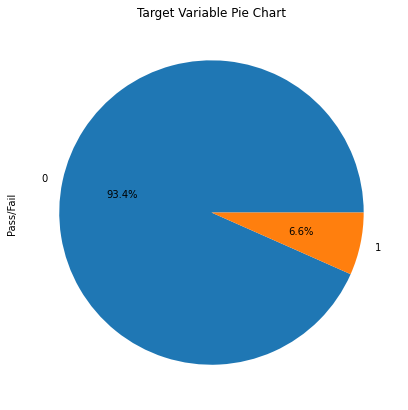

In [69]:
#Distribution of Target Variable.

f,axes=plt.subplots(1,1,figsize=(17,7))
df3['Pass/Fail'].value_counts().plot.pie(autopct='%1.1f%%')
axes.set_title('Target Variable Pie Chart')
plt.show()

It is evident that there is imbalance in the dataset.

Only 6.6% represents the fail category.

If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model. Most of the predictions will correspond to the majority class and treat the minority class features as noise in the data and ignore them. This will result in a high bias in the model

In [70]:
X = df3.iloc[:,:-1]

In [141]:
X.shape

(1567, 278)

In [142]:
#  standardization of dependent variables

from sklearn import preprocessing

standardX = preprocessing.scale(X)
print(standardX)

[[ 0.22430902  0.84972455 -0.43627303 ...  0.78381022  0.40557216
   0.0335604 ]
 [ 1.10713647 -0.38291013  1.01713652 ... -0.84824788 -0.51969316
   0.15307315]
 [-1.11415813  0.79910249 -0.48128937 ...  0.35401556 -0.43398106
   0.68621759]
 ...
 [-0.48522015 -1.44722022  0.19585896 ...  0.         -0.19906056
  -0.6503603 ]
 [-1.62724627  0.45085763 -0.80057106 ... -0.19193982  0.27999762
  -0.48376119]
 [-0.94657746 -0.56220698 -0.17373672 ...  0.          0.0060025
   3.45290455]]


In [72]:
y=df3['Pass/Fail']

In [143]:
# Split X and y into training and test set in 70:30 ratio

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(standardX, y, test_size=0.30, random_state=1)



In [144]:
print('x_train shape:' , X_train.shape)
print('x_test shape:' , X_test.shape)
print('y_train shape:' , y_train.shape)
print('y_test shape:' , y_test.shape)

x_train shape: (1096, 278)
x_test shape: (471, 278)
y_train shape: (1096,)
y_test shape: (471,)


Checking if the train and test data have similar statistical characteristics when compared with original data.

Does the mean of original data differ significantly from train/test data?

H0: The mean of original and Train/Test Data are same.

H1: The mean of original and Train/Test Data are significantly different.

In [145]:
def test_stats(sample1,sample2):
    from scipy import stats
    stats,p_value=stats.ttest_ind(sample1,sample2,axis=0,equal_var=False)
    if p_value.all()<0.05:
        print('Reject Null Hypothesis.The means of original and train/test data are significantly different.')
    else:
        print('Fail to reject Null Hypothesis.The means of original and train/test data are same')

In [146]:
print("Comparing X and X_train")
test_stats(X,X_train)
print("")

print("Comparing X and X_test")
test_stats(X,X_train)
print("")


print("Comparing y and y_train")
test_stats(y,y_train)
print("")


print("Comparing y and y_test")
test_stats(y,y_test)
print("")

Comparing X and X_train
Reject Null Hypothesis.The means of original and train/test data are significantly different.

Comparing X and X_test
Reject Null Hypothesis.The means of original and train/test data are significantly different.

Comparing y and y_train
Fail to reject Null Hypothesis.The means of original and train/test data are same

Comparing y and y_test
Fail to reject Null Hypothesis.The means of original and train/test data are same



# Question 5. Model training, testing and tuning: [20 Marks]
#    A. Use any Supervised Learning technique to train a model. [2 Marks]
#    B. Use cross validation techniques. [3 Marks]
#        Hint: Use all CV techniques that you have learnt in the course.
#    C. Apply hyper-parameter tuning techniques to get the best accuracy. [3 Marks]
#    Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.
#    D. Use any other technique/method which can enhance the model performance. [4 Marks]
#         Hint: Dimensionality reduction, attribute removal, standardisation/normalisation, target balancing etc.
#    E. Display and explain the classification report in detail. [3 Marks]
#    F. Apply the above steps for all possible models that you have learnt so far. [5 Marks]

In [92]:
X1 = df3.iloc[:,:-1]
X1.head()

,0,1,2,3,4,6,7,8,9,10,...,569,570,571,572,573,582,583,586,587,589
0,0.390529,1.186411,-0.540763,0.223804,0.213645,-1.082078,0.928262,0.507421,1.295056,-0.450902,...,0.571845,0.490992,-0.119485,0.241119,0.353281,0.127025,-0.655217,0.096696,0.297094,1.262859
1,1.502186,-0.580303,1.173787,0.385804,-1.419837,0.210770,1.194192,0.453349,0.071565,-1.864898,...,0.571845,0.996739,1.488869,-1.673768,-0.292905,0.565250,0.017644,-1.081781,0.929647,0.260785
2,-1.294868,1.113856,-0.593868,1.108493,0.675254,-1.663040,0.875076,-0.281469,0.408574,0.132062,...,0.347171,1.000251,-0.528812,1.669386,-1.281416,-1.344155,0.656863,0.001449,0.004836,0.653581
3,-0.333033,-0.316529,-0.086912,-1.322166,0.091164,0.728292,-0.401387,0.336888,-0.800264,-0.438498,...,1.513188,-0.931985,-0.548779,0.481270,-1.466040,-0.342500,-1.159864,-0.028365,0.022285,0.326758
4,0.412985,0.093965,1.292049,-0.037098,0.746650,-0.321293,0.555960,0.543469,-0.118919,-0.922234,...,0.571845,-0.304441,-0.537797,0.165282,-0.842932,0.033120,0.017644,-0.028365,0.022285,0.326758


In [78]:
y1=df3['Pass/Fail']

In [79]:
XScaled  = X1.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,0,1,2,3,4,6,7,8,9,10,...,569,570,571,572,573,582,583,586,587,589
count,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1567.000000,1.567000e+03,1567.000000,1.567000e+03,1.567000e+03,...,1567.000000,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1567.000000
mean,-1.360324e-17,-5.668018e-18,2.267207e-18,9.068829e-18,1.813766e-17,0.000000,1.360324e-17,0.000000,-1.360324e-17,4.534414e-18,...,0.000000,1.813766e-17,-1.813766e-17,1.360324e-17,9.068829e-18,-4.534414e-18,3.627532e-17,-9.068829e-18,-1.360324e-17,0.000000
std,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319,1.000319e+00,1.000319,1.000319e+00,1.000319e+00,...,1.000319,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319
min,-2.748507e+00,-2.580590e+00,-2.668997e+00,-1.935106e+00,-1.874984e+00,-2.714757,-2.847942e+00,-2.779851,-2.646490e+00,-2.671124e+00,...,-2.792758,-2.681374e+00,-2.728193e+00,-2.356303e+00,-2.382753e+00,-2.596224e+00,-2.606516e+00,-2.632091e+00,-2.019281e+00,-2.349705
25%,-6.748436e-01,-6.417787e-01,-7.183756e-01,-7.837950e-01,-8.403637e-01,-0.642920,-7.205030e-01,-0.723746,-6.683907e-01,-6.555592e-01,...,-0.785768,-6.687053e-01,-6.331399e-01,-6.752460e-01,-5.871503e-01,-6.555176e-01,-7.225035e-01,-6.942034e-01,-7.280341e-01,-0.741555
50%,6.328932e-02,2.319642e-02,-9.704852e-03,-1.578754e-01,8.100877e-02,-0.021861,-2.908546e-02,-0.031908,1.295459e-02,2.043040e-02,...,0.347171,-1.385035e-01,-8.304493e-02,5.152658e-02,6.736955e-02,3.312026e-02,1.764432e-02,1.448608e-03,4.835587e-03,0.260785
75%,7.013132e-01,6.362567e-01,6.512111e-01,6.487873e-01,6.035507e-01,0.678792,7.155180e-01,0.734105,6.576684e-01,6.778148e-01,...,0.571845,6.283553e-01,7.638118e-01,6.898225e-01,6.186791e-01,6.904564e-01,6.232198e-01,6.871627e-01,5.981110e-01,0.480732
max,2.778576e+00,2.564434e+00,2.636196e+00,2.745083e+00,2.710952e+00,2.748497,2.736585e+00,2.668896,2.635768e+00,2.662371e+00,...,2.607355,2.684600e+00,2.760776e+00,2.724786e+00,2.471336e+00,2.693767e+00,2.709091e+00,2.704553e+00,2.674575e+00,2.521591


In [80]:
#    A. Use any Supervised Learning technique to train a model. [2 Marks]

X_train, X_test, y_train, y_test = train_test_split(XScaled, y1, test_size=0.20, random_state=1)

model = LogisticRegression(solver="liblinear")

# Training the model
model.fit(X_train, y_train)

#Predict test data set.

y_pred = model.predict(X_test)
#Checking performance our model with classification report.

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       294
           1       0.23      0.30      0.26        20

    accuracy                           0.89       314
   macro avg       0.59      0.62      0.60       314
weighted avg       0.91      0.89      0.90       314



# B. Use cross validation techniques. [3 Marks]
#     Hint: Use all CV techniques that you have learnt in the course


#  i) K - Fold Cross Validation

In [83]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

logreg=LogisticRegression()
kf=KFold(n_splits=5)
score=cross_val_score(logreg,X1,y1,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.74840764 0.85350318 0.91693291 0.87859425 0.91054313]
Average Cross Validation score :0.8615962231130828


# ii) Stratified K-Fold Cross-Validation

In [84]:
from sklearn.model_selection import StratifiedKFold

logreg1=LogisticRegression()
stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(logreg1,X1,y1,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.63375796 0.77070064 0.87220447 0.84664537 0.9201278 ]
Average Cross Validation score :0.8086872469017724


# iv) Leave One Out cross-validation


In [86]:
from sklearn.model_selection import LeaveOneOut

loo=LeaveOneOut()


logreg3=LogisticRegression()

score=cross_val_score(logreg3,X1,y1,cv=loo)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0. 1. 1. ... 1. 1. 1.]
Average Cross Validation score :0.8895979578813018


# v) Monte Carlo Cross-Validation(Shuffle Split)

In [77]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

logreg4=LogisticRegression()
shuffle_split=ShuffleSplit(test_size=0.3,train_size=0.5,n_splits=10)

scores=cross_val_score(logreg4,X1,y1,cv=shuffle_split)

print("cross Validation scores:n {}".format(scores))
print("Average Cross Validation score :{}".format(scores.mean()))

cross Validation scores:n [0.91932059 0.91295117 0.91295117 0.91082803 0.90233546 0.89808917
 0.92356688 0.93418259 0.92781316 0.91082803]
Average Cross Validation score :0.9152866242038218


# vi) Time Series Cross-Validation

In [76]:
from sklearn.model_selection import TimeSeriesSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
time_series = TimeSeriesSplit()
print(time_series)
for train_index, test_index in time_series.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]


# C. Apply hyper-parameter tuning techniques to get the best accuracy. [3 Marks]
#     Suggestion: Use all possible hyper parameter combinations to extract the best accuracies. 

# D. Use any other technique/method which can enhance the model performance. [4 Marks]
#    Hint: Dimensionality reduction, attribute removal, standardisation/normalisation, target balancing etc.
# E. Display and explain the classification report in detail. [3 Marks]
# F. Apply the above steps for all possible models that you have learnt so far. [5 Marks]

# Logistic Regression


comparing different strategies to handle data imbalance with logistic regression

In [103]:
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
scl=StandardScaler()
smote=SMOTE(random_state=1)

In [94]:
X2 = df3.iloc[:,:-1]

y2=df3['Pass/Fail']

XScaled  = X1.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

X_train, X_test, y_train, y_test = train_test_split(XScaled, y2, test_size=0.20, random_state=1)

def evaluate_models(models,X1,y1,cv):
    for model in models:
        score=cross_val_score(model,X2,y2,scoring="f1",cv=cv,n_jobs=-1)
        print(f"{model}:{score.mean():.3f} +/- {score.std():.3f}")

In [95]:
model1 = make_pipeline( scl, smote,LogisticRegression(random_state=7))
model2 = make_pipeline(scl,RandomUnderSampler(random_state=7),LogisticRegression(random_state=7))
model3 = make_pipeline(scl,RandomOverSampler(random_state=7),LogisticRegression(random_state=7))
model4 = make_pipeline(scl,LogisticRegression(class_weight="balanced",random_state=7))
model5 = make_pipeline(scl,TomekLinks(),LogisticRegression(random_state=7))
models=[model1,model2,model3,model4,model5]
evaluate_models(models,X_train,y_train,5)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('smote', SMOTE(random_state=1)),
                ('logisticregression', LogisticRegression(random_state=7))]):0.115 +/- 0.060
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomundersampler', RandomUnderSampler(random_state=7)),
                ('logisticregression', LogisticRegression(random_state=7))]):0.143 +/- 0.045
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomoversampler', RandomOverSampler(random_state=7)),
                ('logisticregression', LogisticRegression(random_state=7))]):0.116 +/- 0.046
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', random_state=7))]):0.127 +/- 0.040
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('tomeklinks', TomekLinks()),
                ('logisticregression', LogisticRegression(random_state

Smote and random under sampler Yields better results. Already many features has been reduced undersampling will reduce further informations. So handling imbalance data with smote.

Getting best parameteres for logistic regression.

In [96]:
def random_search(pipeline,X,y,distribution,cv):
    print(cv)
    randomsearch_model= RandomizedSearchCV(pipeline,distribution,n_iter=20,scoring="f1",cv=cv,random_state=7,n_jobs=-1)
    randomsearch_model.fit(X,y)
    print(pipeline.named_steps.keys())
    #getting best parameters
    print(randomsearch_model.best_params_)
    print("Best f1 ",randomsearch_model.best_score_)

In [97]:
from scipy.stats import loguniform
#optimising Logistic regressor
C = loguniform(1e-5, 100)
penalty = ['l1', 'l2']
solver = ['newton-cg', 'lbfgs', 'liblinear']
distribution={'logisticregression__C':C,
            'logisticregression__penalty': penalty,
            'logisticregression__solver': solver
           }
#run randomized Search
print("Best params for logistic regression")
random_search(model1,X_train,y_train,distribution,5)

Best params for logistic regression
5
dict_keys(['standardscaler', 'smote', 'logisticregression'])
{'logisticregression__C': 0.003179264694749921, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'newton-cg'}
Best f1  0.17785947996418647


Building logistic regression model with best parameters

In [98]:
pipe_LG = make_pipeline( scl, smote,LogisticRegression(random_state=7,C=0.003179264694749921,penalty='l2',solver='newton-cg'))
pipe_LG.fit(X_train, y_train)
y_pred = pipe_LG.predict(X_test)
print('Train Accuracy: %.3f' % pipe_LG.score(X_train, y_train))
print('Test Accuracy: %.3f' % pipe_LG.score(X_test, y_test))
auc = roc_auc_score(y_test, y_pred)
print('The auc score on the test set is {:.4f}.'.format(auc))
print(classification_report(y_test, y_pred)) 

Train Accuracy: 0.858
Test Accuracy: 0.796
The auc score on the test set is 0.6582.
              precision    recall  f1-score   support

           0       0.96      0.82      0.88       294
           1       0.16      0.50      0.24        20

    accuracy                           0.80       314
   macro avg       0.56      0.66      0.56       314
weighted avg       0.91      0.80      0.84       314



Good accuracy obtained after sampling

#  Decision Tree

In [100]:
#Creating Pipeline
from sklearn.tree import DecisionTreeClassifier

DT=DecisionTreeClassifier(random_state=1)
pipe_DT = make_pipeline(scl, smote, DT)
parameter={'decisiontreeclassifier__max_depth':np.arange(1,5),'decisiontreeclassifier__criterion':['entropy','gini'],
          'decisiontreeclassifier__max_features':np.arange(1,10),'decisiontreeclassifier__min_samples_leaf':np.arange(1,5)
           
          }

In [101]:
#Grid Search CV
grid = GridSearchCV( pipe_DT , param_grid = parameter,scoring='f1', cv = 5) 
grid.fit( X_train, y_train) 
print(" Best cross-validation accuracy: {:.2f}". format( grid.best_score_)) 
print(" Best parameters: ", grid.best_params_) 
print(" Test set accuracy: {:.2f}". format( grid.score( X_test, y_test)))

 Best cross-validation accuracy: 0.16
 Best parameters:  {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 2, 'decisiontreeclassifier__max_features': 6, 'decisiontreeclassifier__min_samples_leaf': 1}
 Test set accuracy: 0.15


In [102]:
#Creating model with best parameters
scl=StandardScaler()
smote=SMOTE(random_state=1)
DT=DecisionTreeClassifier(random_state=1,criterion='gini',max_depth=2,max_features=5,min_samples_leaf=1)
pipe_DT = make_pipeline(scl, smote, DT)
pipe_DT.fit(X_train, y_train)
y_pred = pipe_DT.predict(X_test)
print('Train Accuracy: %.3f' % pipe_DT.score(X_train, y_train))
print('Test Accuracy: %.3f' % pipe_DT.score(X_test, y_test))
print(classification_report(y_test, y_pred))

Train Accuracy: 0.412
Test Accuracy: 0.350
              precision    recall  f1-score   support

           0       0.92      0.34      0.49       294
           1       0.05      0.55      0.10        20

    accuracy                           0.35       314
   macro avg       0.49      0.44      0.29       314
weighted avg       0.86      0.35      0.47       314



In [104]:
#Random Search CV
parameter={'decisiontreeclassifier__max_depth':np.arange(1,5),'decisiontreeclassifier__criterion':['entropy','gini'],
          'decisiontreeclassifier__max_features':np.arange(1,10),'decisiontreeclassifier__min_samples_leaf':np.arange(1,5)
           #,'max_leaf_nodes':np.arange(2,20)
          }
randomsearch_model= RandomizedSearchCV(pipe_DT,parameter,n_iter=20,scoring="f1",cv=5,random_state=7,n_jobs=-1)
#randomsearch_model.fit(X,y)
randomsearch_model.fit( X_train, y_train) 
print(" Best cross-validation accuracy: {:.2f}". format( randomsearch_model.best_score_)) 
print(" Best parameters: ", randomsearch_model.best_params_) 
print(" Test set accuracy: {:.2f}". format( randomsearch_model.score( X_test, y_test)))

 Best cross-validation accuracy: 0.14
 Best parameters:  {'decisiontreeclassifier__min_samples_leaf': 2, 'decisiontreeclassifier__max_features': 7, 'decisiontreeclassifier__max_depth': 3, 'decisiontreeclassifier__criterion': 'entropy'}
 Test set accuracy: 0.12


In [106]:
#Creating model with Random seacrch cv yielded parameters
scl=StandardScaler()
smote=SMOTE(random_state=1)
DT=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=3,max_features=7,min_samples_leaf=2)
pipe_DT = make_pipeline(scl, smote, DT)
pipe_DT.fit(X_train, y_train)
y_pred = pipe_DT.predict(X_test)
print('Train Accuracy: %.3f' % pipe_DT.score(X_train, y_train))
print('Test Accuracy: %.3f' % pipe_DT.score(X_test, y_test))
print(classification_report(y_test, y_pred))

Train Accuracy: 0.433
Test Accuracy: 0.385
              precision    recall  f1-score   support

           0       0.94      0.37      0.53       294
           1       0.07      0.65      0.12        20

    accuracy                           0.39       314
   macro avg       0.50      0.51      0.32       314
weighted avg       0.88      0.39      0.50       314



From above classification report Train and test both accuracy increased in decision tree as compared to Logistic Regression. After usinh GridSearchCV and RandomSearchCV accruarcy got increased and test accuracy is close to train accuracy means our model is best fit. Accuracy increased in RandomSearchCV as compared to GridSearchCV

# Random Forest 

In [127]:
rf = make_pipeline(scl, smote,RandomForestClassifier(random_state=7))
parameter={'randomforestclassifier__max_depth':np.arange(1,5),'randomforestclassifier__criterion':['entropy','gini'],
          'randomforestclassifier__max_features':np.arange(1,10),'randomforestclassifier__min_samples_leaf':np.arange(1,5)
           ,'randomforestclassifier__n_estimators': np.arange(45,55)
          }
random_search(rf,X_train,y_train,parameter,5)

5
dict_keys(['standardscaler', 'smote', 'randomforestclassifier'])
{'randomforestclassifier__n_estimators': 47, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__max_features': 1, 'randomforestclassifier__max_depth': 4, 'randomforestclassifier__criterion': 'entropy'}
Best f1  0.19047694334650855


In [128]:
#Building random forest with best parameters
pipe_rf = make_pipeline( scl, smote,RandomForestClassifier(random_state=7,max_depth=4,criterion='entropy',max_features=1,min_samples_leaf=2,n_estimators=48))
pipe_rf.fit(X_train, y_train)
y_pred = pipe_rf.predict(X_test)
print('Train Accuracy: %.3f' % pipe_rf.score(X_train, y_train))
print('Test Accuracy: %.3f' % pipe_rf.score(X_test, y_test))
auc = roc_auc_score(y_test, y_pred)
print('The auc score on the test set is {:.4f}.'.format(auc))
print(classification_report(y_test, y_pred))

Train Accuracy: 0.883
Test Accuracy: 0.860
The auc score on the test set is 0.5990.
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       294
           1       0.17      0.30      0.21        20

    accuracy                           0.86       314
   macro avg       0.56      0.60      0.57       314
weighted avg       0.90      0.86      0.88       314



Recall for class 1 is  less as compared to precvious model Decision Tree.

# Bagging 

In [129]:
bg = make_pipeline(scl, smote,BaggingClassifier(base_estimator=DT,random_state=7))
parameter={'baggingclassifier__n_estimators': np.arange(45,55),'baggingclassifier__max_samples': [0.5,1.0, 1096//2,],
          'baggingclassifier__max_features': [0.5,1.0, 1096//2,],
          'baggingclassifier__bootstrap': [True, False],
          'baggingclassifier__bootstrap_features': [True, False]}
random_search(bg,X_train,y_train,parameter,5)

5
dict_keys(['standardscaler', 'smote', 'baggingclassifier'])
{'baggingclassifier__n_estimators': 47, 'baggingclassifier__max_samples': 548, 'baggingclassifier__max_features': 1.0, 'baggingclassifier__bootstrap_features': False, 'baggingclassifier__bootstrap': False}
Best f1  0.14223411371237457


In [134]:
#Building Bagging with best parameters
pipe_BG = make_pipeline( scl, smote,BaggingClassifier(base_estimator=DT,random_state=7,n_estimators=47,max_samples=548,max_features=1.0,bootstrap_features=False, bootstrap =False))
pipe_BG.fit(X_train, y_train)
y_pred = pipe_BG.predict(X_test)
print('Train Accuracy: %.3f' % pipe_BG.score(X_train, y_train))
print('Test Accuracy: %.3f' % pipe_BG.score(X_test, y_test))
auc = roc_auc_score(y_test, y_pred)
print('The auc score on the test set is {:.4f}.'.format(auc))
print(classification_report(y_test, y_pred))

Train Accuracy: 0.859
Test Accuracy: 0.854
The auc score on the test set is 0.6655.
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       294
           1       0.20      0.45      0.28        20

    accuracy                           0.85       314
   macro avg       0.58      0.67      0.60       314
weighted avg       0.91      0.85      0.88       314



recall for class 1 is less as compared to LR and DT

# Light GBM

In [135]:
import lightgbm as lgb
lgbc = make_pipeline(scl, smote,lgb.LGBMClassifier(random_state=7))
# Hyperparameter grid
param_grid = {
    'lgbmclassifier__boosting_type': ['gbdt', 'goss', 'dart'],
    'lgbmclassifier__num_leaves': list(range(20, 150)),
    'lgbmclassifier__learning_rate': list(np.logspace(np.log10(0.005), np.log10(0.5), base = 10, num = 1000)),
    'lgbmclassifier__subsample_for_bin': list(range(20000, 300000, 20000)),
    'lgbmclassifier__min_child_samples': list(range(20, 500, 5)),
    'lgbmclassifier__is_unbalance': [True, False]
}
random_search(lgbc,X_train,y_train,param_grid,5)

5
dict_keys(['standardscaler', 'smote', 'lgbmclassifier'])
{'lgbmclassifier__subsample_for_bin': 40000, 'lgbmclassifier__num_leaves': 74, 'lgbmclassifier__min_child_samples': 175, 'lgbmclassifier__learning_rate': 0.009188281001940852, 'lgbmclassifier__is_unbalance': True, 'lgbmclassifier__boosting_type': 'goss'}
Best f1  0.16637657961735422


In [136]:
#Building light gbm with best parameters
pipe_lgbc = make_pipeline( scl, smote,lgb.LGBMClassifier(random_state=7,subsample_for_bin=40000,num_leaves=74,min_child_samples=175,
                                                    learning_rate=0.009188281001940852,is_unbalance=True,boosting_type='goss'))
pipe_lgbc.fit(X_train, y_train)
y_pred = pipe_lgbc.predict(X_test)
print('Train Accuracy: %.3f' % pipe_lgbc.score(X_train, y_train))
print('Test Accuracy: %.3f' % pipe_lgbc.score(X_test, y_test))
auc = roc_auc_score(y_test, y_pred)
print('The auc score on the test set is {:.4f}.'.format(auc))
print('f1_score',f1_score(y_pred,y_test))
print(classification_report(y_test, y_pred))

Train Accuracy: 0.848
Test Accuracy: 0.860
The auc score on the test set is 0.6689.
f1_score 0.29032258064516125
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       294
           1       0.21      0.45      0.29        20

    accuracy                           0.86       314
   macro avg       0.59      0.67      0.61       314
weighted avg       0.91      0.86      0.88       314



There is improvement in recall of class 1 in light gbm over bagging

# 6. Post Training and Conclusion: [5 Marks]
#    A. Display and compare all the models designed with their train and test accuracies. [1 Marks]
#    B. Select the final best trained model along with your detailed comments for selecting this model. [1 Marks]
#    C. Pickle the selected model for future use. [2 Marks]
#    D. Write your conclusion on the results. [1 Marks]

In [139]:
#  A. Display and compare all the models designed with their train and test accuracies. [1 Marks]

def score_model(model,params,model_name):
    model_prod = make_pipeline( scl, smote,model(**params))
    model_prod.fit(X_train, y_train)
    y_pred = model_prod.predict(X_test)
    print(model_name)
    print('Train Accuracy: %.3f' % model_prod.score(X_train, y_train))
    print('Test Accuracy: %.3f' % model_prod.score(X_test, y_test))
    auc = roc_auc_score(y_test, y_pred)
    print('The auc score on the test set is {:.4f}.'.format(auc))
    print('f1_score',f1_score(y_pred,y_test))
    print(classification_report(y_test, y_pred))

In [140]:
params=[{'random_state':7,'subsample_for_bin': 20000, 'num_leaves': 132, 'min_child_samples': 415,
         'learning_rate': 0.03234303830773163, 'is_unbalance': True, 'boosting_type': 'dart'},        
{'random_state':7,'n_estimators': 53, 'max_samples': 548, 'max_features': 1.0, 'bootstrap_features': False,
 'bootstrap': True},
{'random_state':7,'n_estimators': 48, 'min_samples_leaf': 3,
 'max_features': 2, 'max_depth': 4, 'criterion': 'gini'},
{'random_state':7,'C': 5.050307266606889e-05, 'penalty': 'l2', 'solver': 'lbfgs'},
{'random_state':7,'min_samples_leaf': 3, 'max_features': 8, 'max_depth': 4, 'criterion': 'gini'}      
       ]

model=[lgb.LGBMClassifier,BaggingClassifier,RandomForestClassifier,LogisticRegression,DecisionTreeClassifier]
model_name=['Light Gradient Boosting','Bagging','Random Forest','Logistic Regression','Decison Tree']
for i,j,k in zip(model,params,model_name):
       score_model(i,j,k)

Light Gradient Boosting
Train Accuracy: 0.803
Test Accuracy: 0.777
The auc score on the test set is 0.5781.
f1_score 0.16666666666666666
              precision    recall  f1-score   support

           0       0.95      0.81      0.87       294
           1       0.11      0.35      0.17        20

    accuracy                           0.78       314
   macro avg       0.53      0.58      0.52       314
weighted avg       0.89      0.78      0.83       314

Bagging
Train Accuracy: 0.974
Test Accuracy: 0.901
The auc score on the test set is 0.5279.
f1_score 0.1142857142857143
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       294
           1       0.13      0.10      0.11        20

    accuracy                           0.90       314
   macro avg       0.54      0.53      0.53       314
weighted avg       0.89      0.90      0.89       314

Random Forest
Train Accuracy: 0.907
Test Accuracy: 0.854
The auc score on the test set is

# B. Select the final best trained model along with your detailed comments for selecting this model. [1 Marks]

# BEST MODEL

Selecting Logistic regression as final model because it has good recall value for minority class and auc,f1 score is best compared to other models. Train and Test accuracy are equally balanced hence there is no over-fitting of data . 

In [141]:
best_data = pd.read_csv("signal-data.csv")
best_data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [142]:
def pre_process(data):
    
    data.isnull().any().any()
    data = data[data.columns[data.isnull().mean() <= 0.75]]
    data = data.replace(np.NaN, 0)
    #data = data.drop('Time',axis = 1,inplace=True)
    data=data[data.columns[data.nunique()>1]]
        
    #df = df.replace(np.NaN, 0)
    corr_matrix = data.corr().abs()


    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


    to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]


    data.drop(to_drop, axis=1, inplace=True)

    for i in data.columns:
            q1 = data[i].quantile(0.25)
            q3 = data[i].quantile(0.75)
            iqr = q3 - q1
    
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    
    data.loc[(data[i] < low) | (data[i] > high), i] = data[i].median()

    #data.dropna(axis=1,inplace=True)

    return data

In [143]:
from sklearn.preprocessing import FunctionTransformer
get_df = FunctionTransformer(pre_process, validate=False)

In [144]:
pipe_LR = make_pipeline(get_df,scl, smote,LogisticRegression(random_state=7,C=0.0008554332369800195,penalty='l2',solver='newton-cg'))
pipe_LR.fit(X_train, y_train)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function pre_process at 0x000001E51E37FD30>)),
                ('standardscaler', StandardScaler()),
                ('smote', SMOTE(random_state=1)),
                ('logisticregression',
                 LogisticRegression(C=0.0008554332369800195, random_state=7,
                                    solver='newton-cg'))])

# C. Pickle the selected model for future use. [2 Marks]

In [150]:
import pickle
# Save to file in the current working directory
pkl_filename = "pickle_logisticregression.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(pipe_LR, file)
    
# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
#Reading Future Data.

df_Future=pd.read_excel('Future_predictions.xlsx')

In [157]:
pickle_model

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function pre_process at 0x000001E51E37FD30>)),
                ('standardscaler', StandardScaler()),
                ('smote', SMOTE(random_state=1)),
                ('logisticregression',
                 LogisticRegression(C=0.0008554332369800195, random_state=7,
                                    solver='newton-cg'))])

# D. Write your conclusion on the results. [1 Marks]

Conclusion
logical regression model is final selected model because it has good recall value for minority class and balanced train/test error.

Futur data contains 8 rows and pickeld final model predicted output for 8 rows.